# DataSets and DataLoaders

## Loading FashMNIST dataset

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

We can index Datasets manually like a list: `training_data[index]`. Then visualize with `matplotlib`.

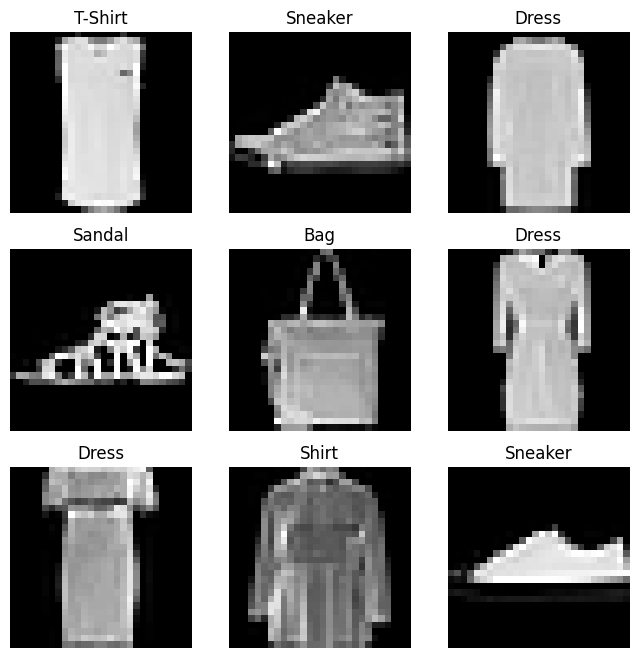

In [2]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()   # single-array tensor to value = .item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [5]:
torch.squeeze?

Docstring:
squeeze(input, dim=None, *, out=None) -> Tensor

Returns a tensor with all the dimensions of :attr:`input` of size `1` removed.

For example, if `input` is of shape:
:math:`(A \times 1 \times B \times C \times 1 \times D)` then the `out` tensor
will be of shape: :math:`(A \times B \times C \times D)`.

When :attr:`dim` is given, a squeeze operation is done only in the given
dimension. If `input` is of shape: :math:`(A \times 1 \times B)`,
``squeeze(input, 0)`` leaves the tensor unchanged, but ``squeeze(input, 1)``
will squeeze the tensor to the shape :math:`(A \times B)`.

.. note:: The returned tensor shares the storage with the input tensor,
          so changing the contents of one will change the contents of the other.

.. warning:: If the tensor has a batch dimension of size 1, then `squeeze(input)`
          will also remove the batch dimension, which can lead to unexpected
          errors.

Args:
    input (Tensor): the input tensor.
    dim (int, optional): if given

In [6]:
img.size()

torch.Size([1, 28, 28])

In [10]:
img[0,10,:]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0196, 0.0000, 0.0000, 0.0000, 0.6353, 1.0000, 0.7922, 1.0000, 0.2078,
        0.0000, 0.0000, 0.0000, 0.0157, 0.0157, 0.0118, 0.0000, 0.0000, 0.0000,
        0.0000])

In [11]:
img.squeeze().size()

torch.Size([28, 28])

## Creating a Custom Dataset for your files

Custom dataset must implement `__init__`, `__len__`, and `__getitem__`.

In [13]:
!pip install pandas

     |████████████████████████████████| 12.2 MB 7.5 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [14]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


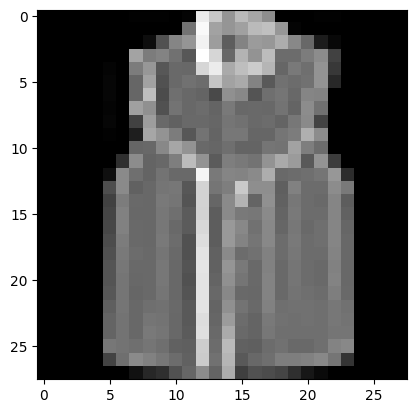

Label: Shirt


In [24]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {labels_map[label.item()]}')

In [20]:
labels_map

{0: 'T-Shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

In [25]:
label.item()

6